In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Data",
    shuffle="True",
    image_size = (256,256),
    batch_size = 32
)

Found 16011 files belonging to 10 classes.


In [3]:
classes = dataset.class_names
classes

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [4]:
len(dataset)  #501 batches*32

501

In [5]:
for image_batch in dataset.take(1):
    print(image_batch[0].shape)   #batch,height,width,color channels

(32, 256, 256, 3)


In [6]:
for image_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[[153. 143. 152.]
   [140. 130. 139.]
   [118. 108. 117.]
   ...
   [100.  88.  98.]
   [ 97.  85.  95.]
   [108.  96. 106.]]

  [[167. 157. 166.]
   [149. 139. 148.]
   [144. 134. 143.]
   ...
   [109.  97. 107.]
   [121. 109. 119.]
   [114. 102. 112.]]

  [[134. 124. 133.]
   [133. 123. 132.]
   [153. 143. 152.]
   ...
   [124. 112. 122.]
   [ 98.  86.  96.]
   [108.  96. 106.]]

  ...

  [[177. 168. 173.]
   [170. 161. 166.]
   [162. 153. 158.]
   ...
   [149. 138. 142.]
   [160. 149. 153.]
   [163. 152. 156.]]

  [[175. 166. 171.]
   [166. 157. 162.]
   [162. 153. 158.]
   ...
   [156. 145. 149.]
   [164. 153. 157.]
   [174. 163. 167.]]

  [[158. 149. 154.]
   [164. 155. 160.]
   [169. 160. 165.]
   ...
   [148. 137. 141.]
   [149. 138. 142.]
   [159. 148. 152.]]]


 [[[124. 109. 114.]
   [123. 108. 113.]
   [155. 140. 145.]
   ...
   [139. 127. 131.]
   [141. 129. 133.]
   [147. 135. 139.]]

  [[129. 114. 119.]
   [140. 125. 130.]
   [140. 125. 130.]
   ...
   [120. 108. 112.]
 

In [7]:
for image_batch in dataset.take(1):
    print(image_batch[0].shape)          #returns tensor image array

(32, 256, 256, 3)


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)         #returns tuple with tensor image array and label

(256, 256, 3)


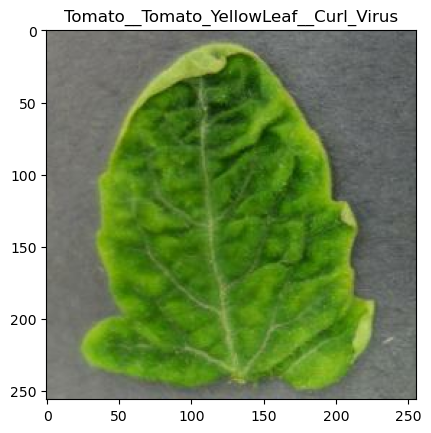

In [9]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))       #shuffles everytime
    plt.title(classes[label_batch[0]])

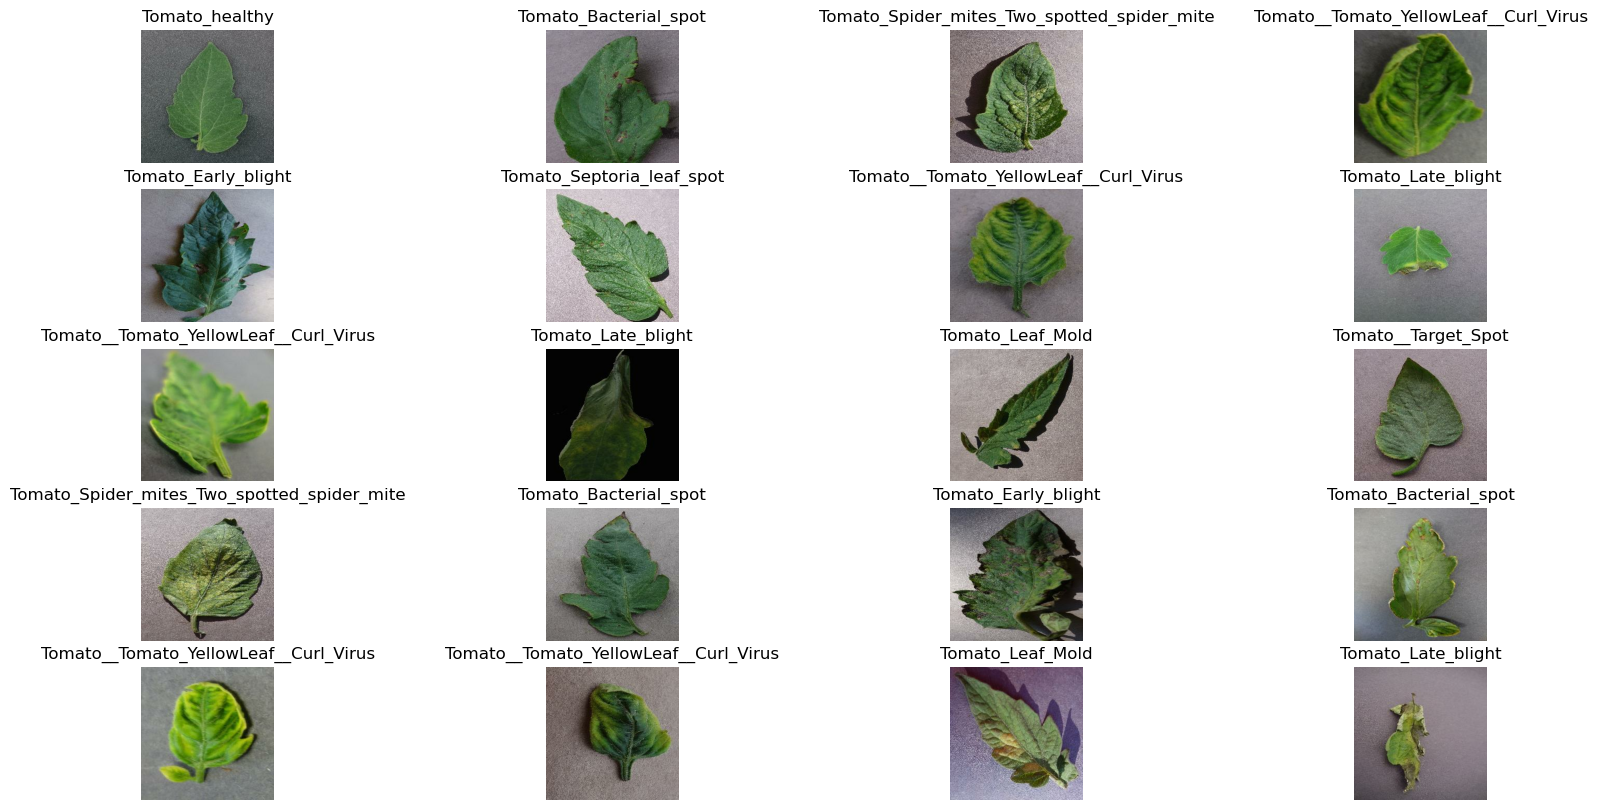

In [10]:
plt.figure(figsize=(20,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(20):
        ax = plt.subplot(5,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))       #shuffles everytime
        plt.title(classes[label_batch[i]])
        plt.axis("off")

In [11]:
#training data split, 80 for training, 10 for validation, 10 for test

In [12]:
train = 0.8
len(dataset)*0.8

400.8

In [13]:
train_ds = dataset.take(400)                #taking 400 batches for training

In [14]:
test_ds = dataset.skip(400)                  #this gives 400 onwards
len(test_ds)

101

In [15]:
val_size = 0.1
len(dataset)*val_size

50.1

In [16]:
val_ds = test_ds.take(50)
len(val_ds)

50

In [17]:
test_ds = test_ds.skip(50)
len(test_ds)

51

In [18]:
def dataset_partitions(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle=True, shuffle_size=80000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 42)
    
    train_size = int(ds_size * train_split)
    
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size).take(val_size)
    
    
    return train_ds, test_ds, val_ds

In [19]:
train_ds, test_ds, val_ds = dataset_partitions(dataset)

In [20]:
len(val_ds)

50

In [21]:
len(train_ds)

400

In [22]:
train_ds = train_ds.cache().shuffle(20000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(20000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(20000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256, 256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])        #for rotated images

In [25]:
#CNN training

In [26]:
input_shape = (32, 256, 256, 3)
n_classes = 10

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation='softmax')
    
])

model.build(input_shape=input_shape)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [28]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [29]:
history = model.fit(
    train_ds, 
    epochs=80, 
    batch_size=32, 
    verbose=1, 
    validation_data=val_ds
)


Epoch 1/80


400/400 [==============================] - 314s 710ms/step - loss: 1.5972 - accuracy: 0.4243 - val_loss: 1.3929 - val_accuracy: 0.5600
Epoch 2/80
400/400 [==============================] - 239s 596ms/step - loss: 0.8464 - accuracy: 0.6989 - val_loss: 1.1123 - val_accuracy: 0.6237
Epoch 3/80
400/400 [==============================] - 225s 563ms/step - loss: 0.5877 - accuracy: 0.7921 - val_loss: 0.7359 - val_accuracy: 0.7656
Epoch 4/80
400/400 [==============================] - 222s 554ms/step - loss: 0.4683 - accuracy: 0.8308 - val_loss: 0.8290 - val_accuracy: 0.7450
Epoch 5/80
400/400 [==============================] - 227s 569ms/step - loss: 0.4105 - accuracy: 0.8555 - val_loss: 0.4712 - val_accuracy: 0.8456
Epoch 6/80
400/400 [==============================] - 218s 545ms/step - loss: 0.3482 - accuracy: 0.8799 - val_loss: 0.3688 - val_accuracy: 0.8856
Epoch 7/80
400/400 [==============================] - 222s 555ms/step - loss: 0.2951 - accuracy: 0.8947 - val_loss: 0.6788

In [30]:
scores = model.evaluate(test_ds)

50/50 [==============================] - 76s 162ms/step - loss: 0.0620 - accuracy: 0.9806


In [31]:
print(history.params)

{'verbose': 1, 'epochs': 80, 'steps': 400}


In [32]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [33]:
acc = history.history['accuracy']

In [36]:
val_acc = history.history['val_accuracy']

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']

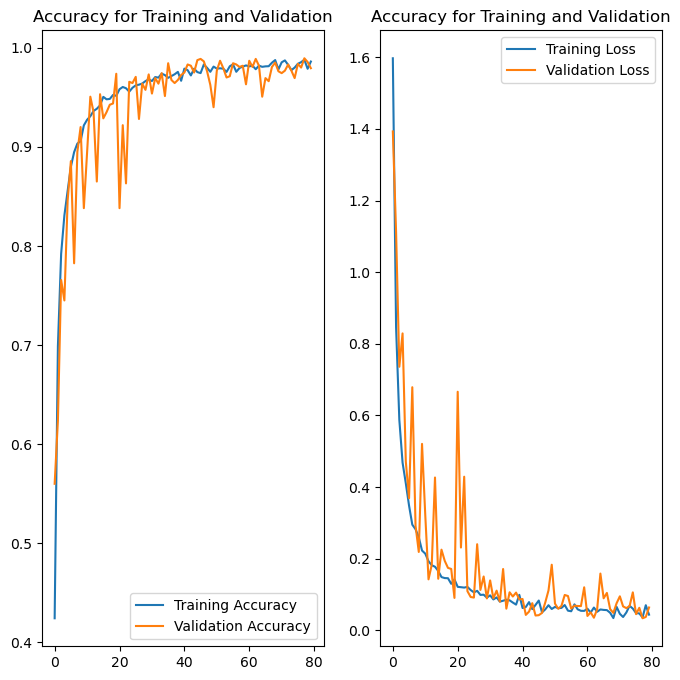

In [42]:
plt.figure(figsize= (8,8))
plt.subplot(1, 2, 1)
plt.plot(range(80), acc, label='Training Accuracy')
plt.plot(range(80), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy for Training and Validation')

plt.subplot(1, 2, 2)
plt.plot(range(80), loss, label='Training Loss')
plt.plot(range(80), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Accuracy for Training and Validation')
plt.show()

In [43]:
#making predictions

Prediction of first image
Actual label for the image: Tomato_Bacterial_spot
1/1 [==============================] - 0s 243ms/step
[9.9297345e-01 6.9177337e-03 1.0513655e-04 6.7275230e-10 3.5661876e-09
 5.4110774e-07 2.5015333e-07 2.8672991e-06 1.6767800e-21 7.5403593e-11]
Index in classes: 0
Predicted label for the image:
Tomato_Bacterial_spot


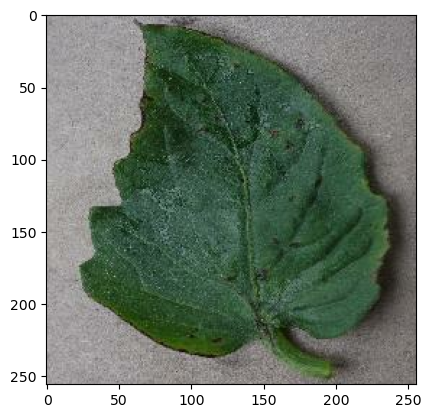

In [53]:
import numpy

for image_batch, label_batch in test_ds.take(1):
      
    #first image, tensor to numpy array to int
    
    first_img = image_batch[0].numpy().astype('uint8') #stroes a 3D array, RGB
    first_label = label_batch[0].numpy()
    
    print('Prediction of first image')
    plt.imshow(first_img)
    
    print('Actual label for the image:', classes[first_label])
    
    batch_prediction = model.predict(image_batch)
    
    print(batch_prediction[0])   
    #softmax func used will give an array with probability of each class
    
    print('Index in classes:',numpy.argmax(batch_prediction[0])) #index of max of the probabilities
    
    
    print('Predicted label for the image:')
    print(classes[numpy.argmax(batch_prediction[0])])
    
    
    

In [61]:
def predict(model, img):
    img_arr = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_arr = tf.expand_dims(img_arr, 0)  #creating a batch
    
    predictions = model.predict(img_arr)
    
    predicted_class = classes[numpy.argmax(predictions[0])]
    confidence = round(100 * (numpy.max(predictions[0])), 2)
    return predicted_class, confidence

In [70]:
import os
model_version=max([int(i) for i in os.listdir("./Models") + [0]])+1 #for auto numbering, remove second last line to enable

1/1 [==============================] - 0s 44ms/step


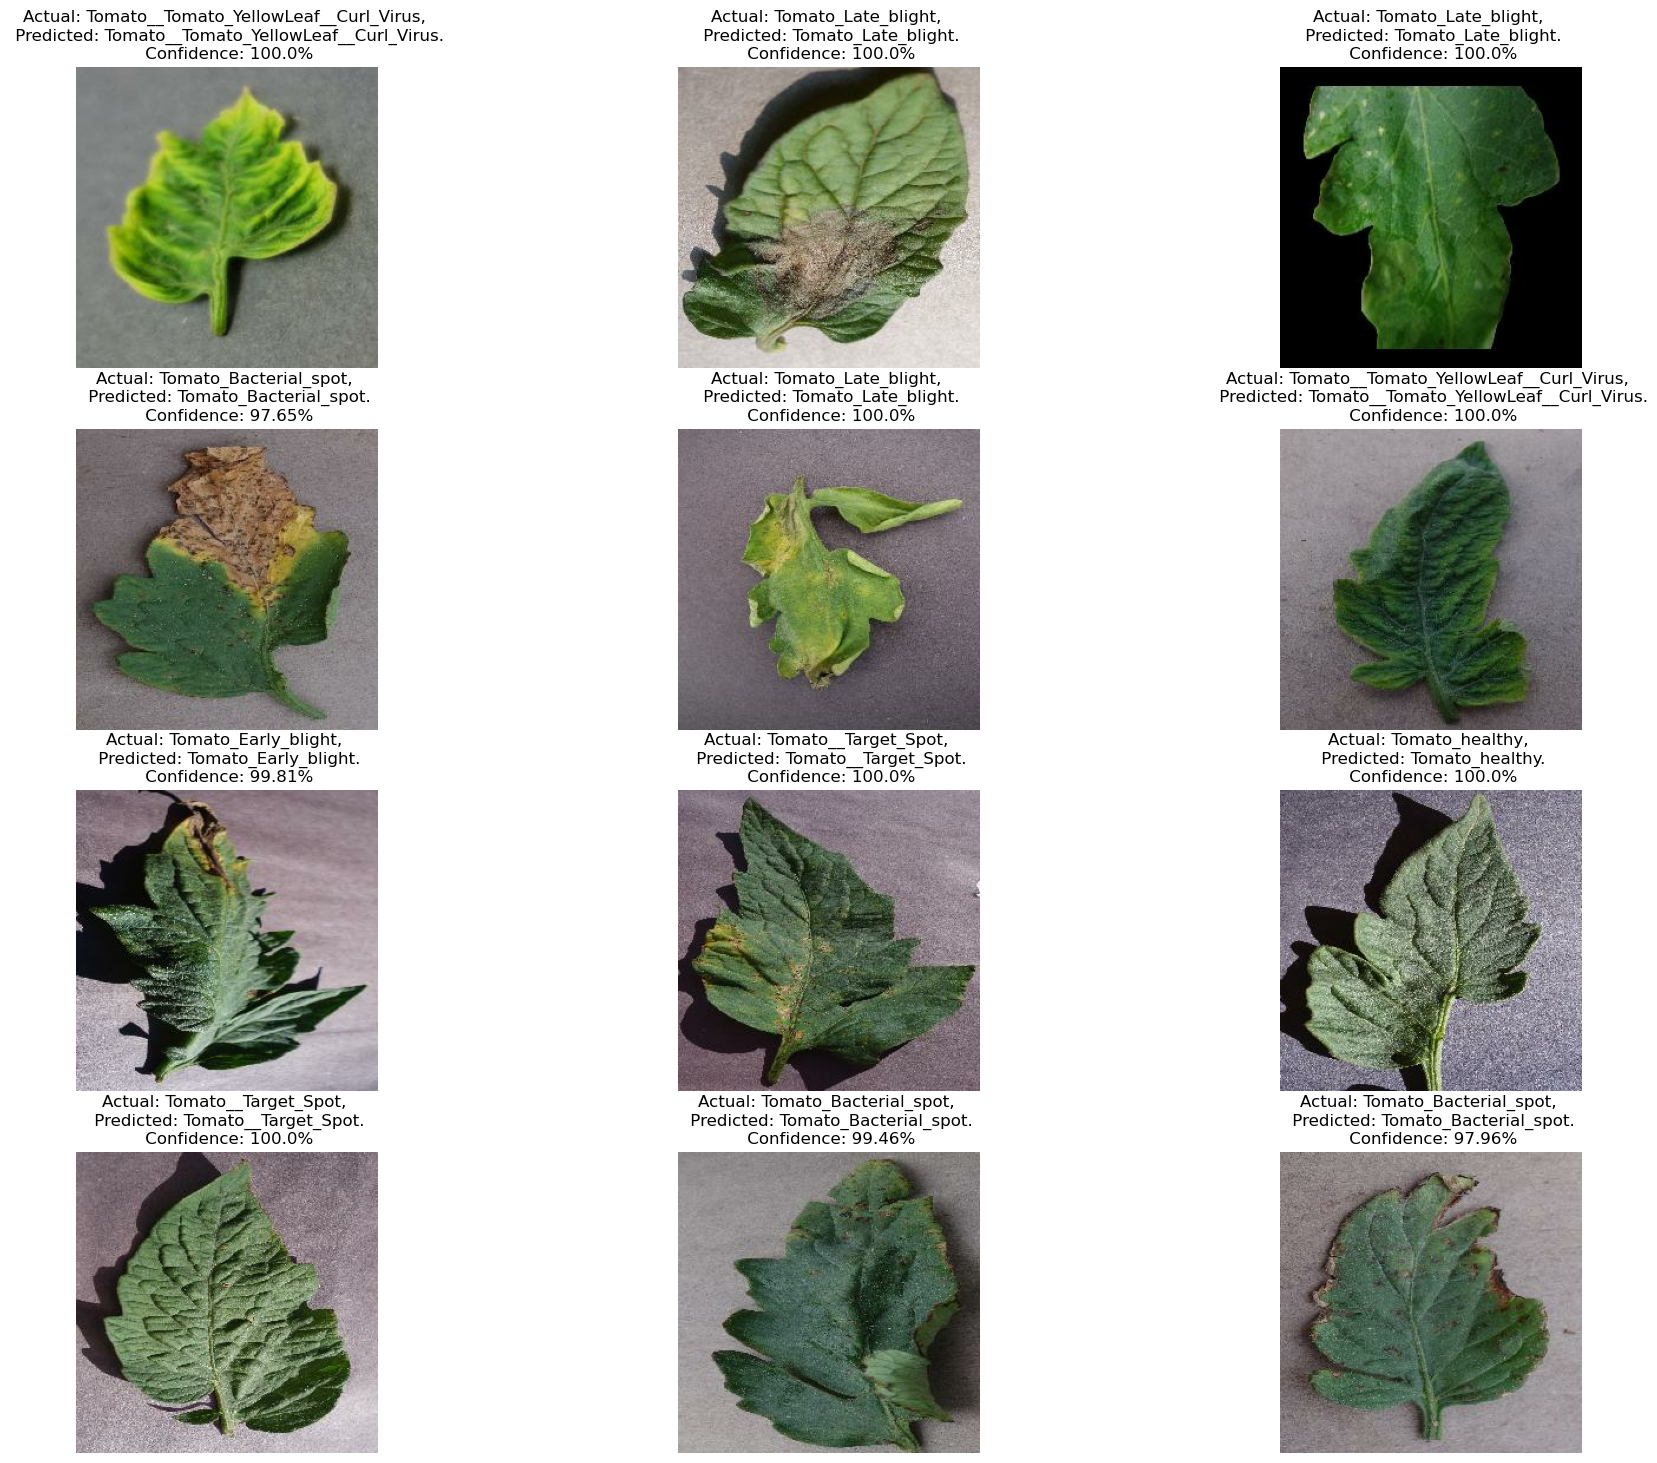

In [72]:
plt.figure(figsize=(22, 18))

for images, labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        
        plt.imshow(images[i].numpy().astype("uint8"))
        
        
        predicted_class, confidence = predict(model, images[i].numpy ())
        actual_class = classes[labels[i]]
        
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [73]:
model_version=1
model.save(f"./Models/{model_version}")

INFO:tensorflow:Assets written to: ./Models/1\assets


INFO:tensorflow:Assets written to: ./Models/1\assets
